In this block I have installed all the library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

used pandas to read csv file

In [ ]:
data=pd.read_csv('/content/data(in) (1).csv')

To get the insight of data

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


mapping the gender column to float value so that it can be easily get fitted into models

In [ ]:
gender_map={'Male':1.0,'Female':0.0}
data['Gender']=data['Gender'].map(gender_map)

mapping the Education column to float value

In [ ]:
edu_map={'Graduate':1.0,'Not Graduate':0.0}
data['Education']=data['Education'].map(edu_map)

mapping the Married column to float value

In [ ]:
married_map={'Yes':1.0,'No':0.0}
data['Married']=data['Married'].map(married_map)

mapping the Self_Employed column to float value

In [ ]:
emp_map={'Yes':1.0,'No':0.0}
data['Self_Employed']=data['Self_Employed'].map(emp_map)

mapping the Property_Area column to float value

In [ ]:
area_map={'Urban':1.0,'Rural':0.0,'Semiurban':0.5}
data['Property_Area']=data['Property_Area'].map(area_map)

filling up the NaN value in Gender ,Education,Married, Self_Employed, Property_Area, Credit_History, Loan_status column with their respective mode because these are discrete value so mode will be better option than mean

In [ ]:
data['Gender'].fillna(data['Gender'].mode(),inplace=True)
data['Education'].fillna(data['Education'].mode(),inplace=True)
data['Married'].fillna(data['Married'].mode(),inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode(),inplace=True)
data['Property_Area'].fillna(data['Property_Area'].mode(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode(),inplace=True)
data['Loan_Status'].fillna(data['Loan_Status'].mode(),inplace=True)

filling the ApplicantIncome,CoapplicantIncome, LoanAmount,Loan_Amount_Term with their respective mean value since the  values are continous in nature so mean will be better choice than mode

In [ ]:
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(),inplace=True)
data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean(),inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data.dropna(inplace=True)


storing all the independent variables in x

In [ ]:
x=data[['Gender','Education','Married','Self_Employed','Property_Area','Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

storing dependent variables in y

In [ ]:
y=data['Loan_Status']

scaling the data using StandardScaler and spliting the data using the train_test_split from sklearn.model_selection

In [ ]:
scale=StandardScaler()
x_scale=scale.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=42)

training the model1 using x_train,y_train with LogisticRegression since Loan_Status is discrete in nature

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

storing the predicted y_test using the model1

In [ ]:
y_test_pred=model1.predict(x_test)

importing accuracy_score and confusion_matrix from sklearn.metrics to get the accuracy and confusion_matrix for predicted output

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_test_pred)
conmat=confusion_matrix(y_test,y_test_pred)

for this model accuracy is 0.84375 i.e. 84.37%

In [ ]:
accuracy

0.84375

In [ ]:
conmat

array([[24, 17],
       [ 3, 84]])

below is the plot to get the importance of each feature from this we can realise that credit_History is most_important feature to get the Loan_status

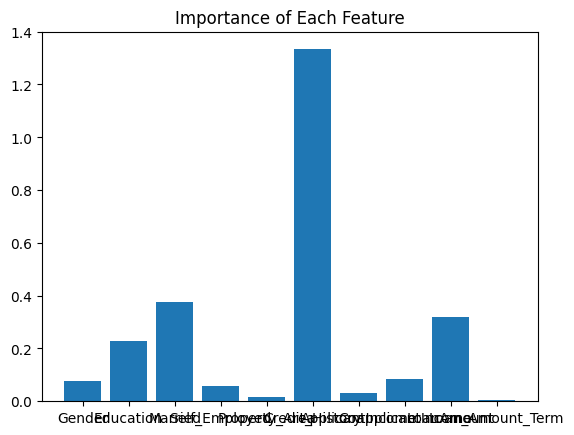

In [ ]:
feature_importance=np.abs(model1.coef_[0])
import matplotlib.pyplot as plt
plt.bar(['Gender','Education','Married','Self_Employed','Property_Area','Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],feature_importance)
plt.title("Importance of Each Feature")
plt.show()

model2 is SVC model using kernel rbf

In [ ]:
model2=SVC(kernel='rbf')
model2.fit(x_train,y_train)

SVC()

y_test_pred2 is the model2 prediction for x_test

In [ ]:
y_test_pred2=model2.predict(x_test)

In [ ]:
accuracy2=accuracy_score(y_test,y_test_pred2)
conmat2=confusion_matrix(y_test,y_test_pred2)

And with SVC accuracy is 0.8515 i.e. 85.15%

In [ ]:
accuracy2

0.8515625

In [ ]:
conmat2

array([[24, 17],
       [ 2, 85]])

below is pairplot of data to get the multivariate relationship

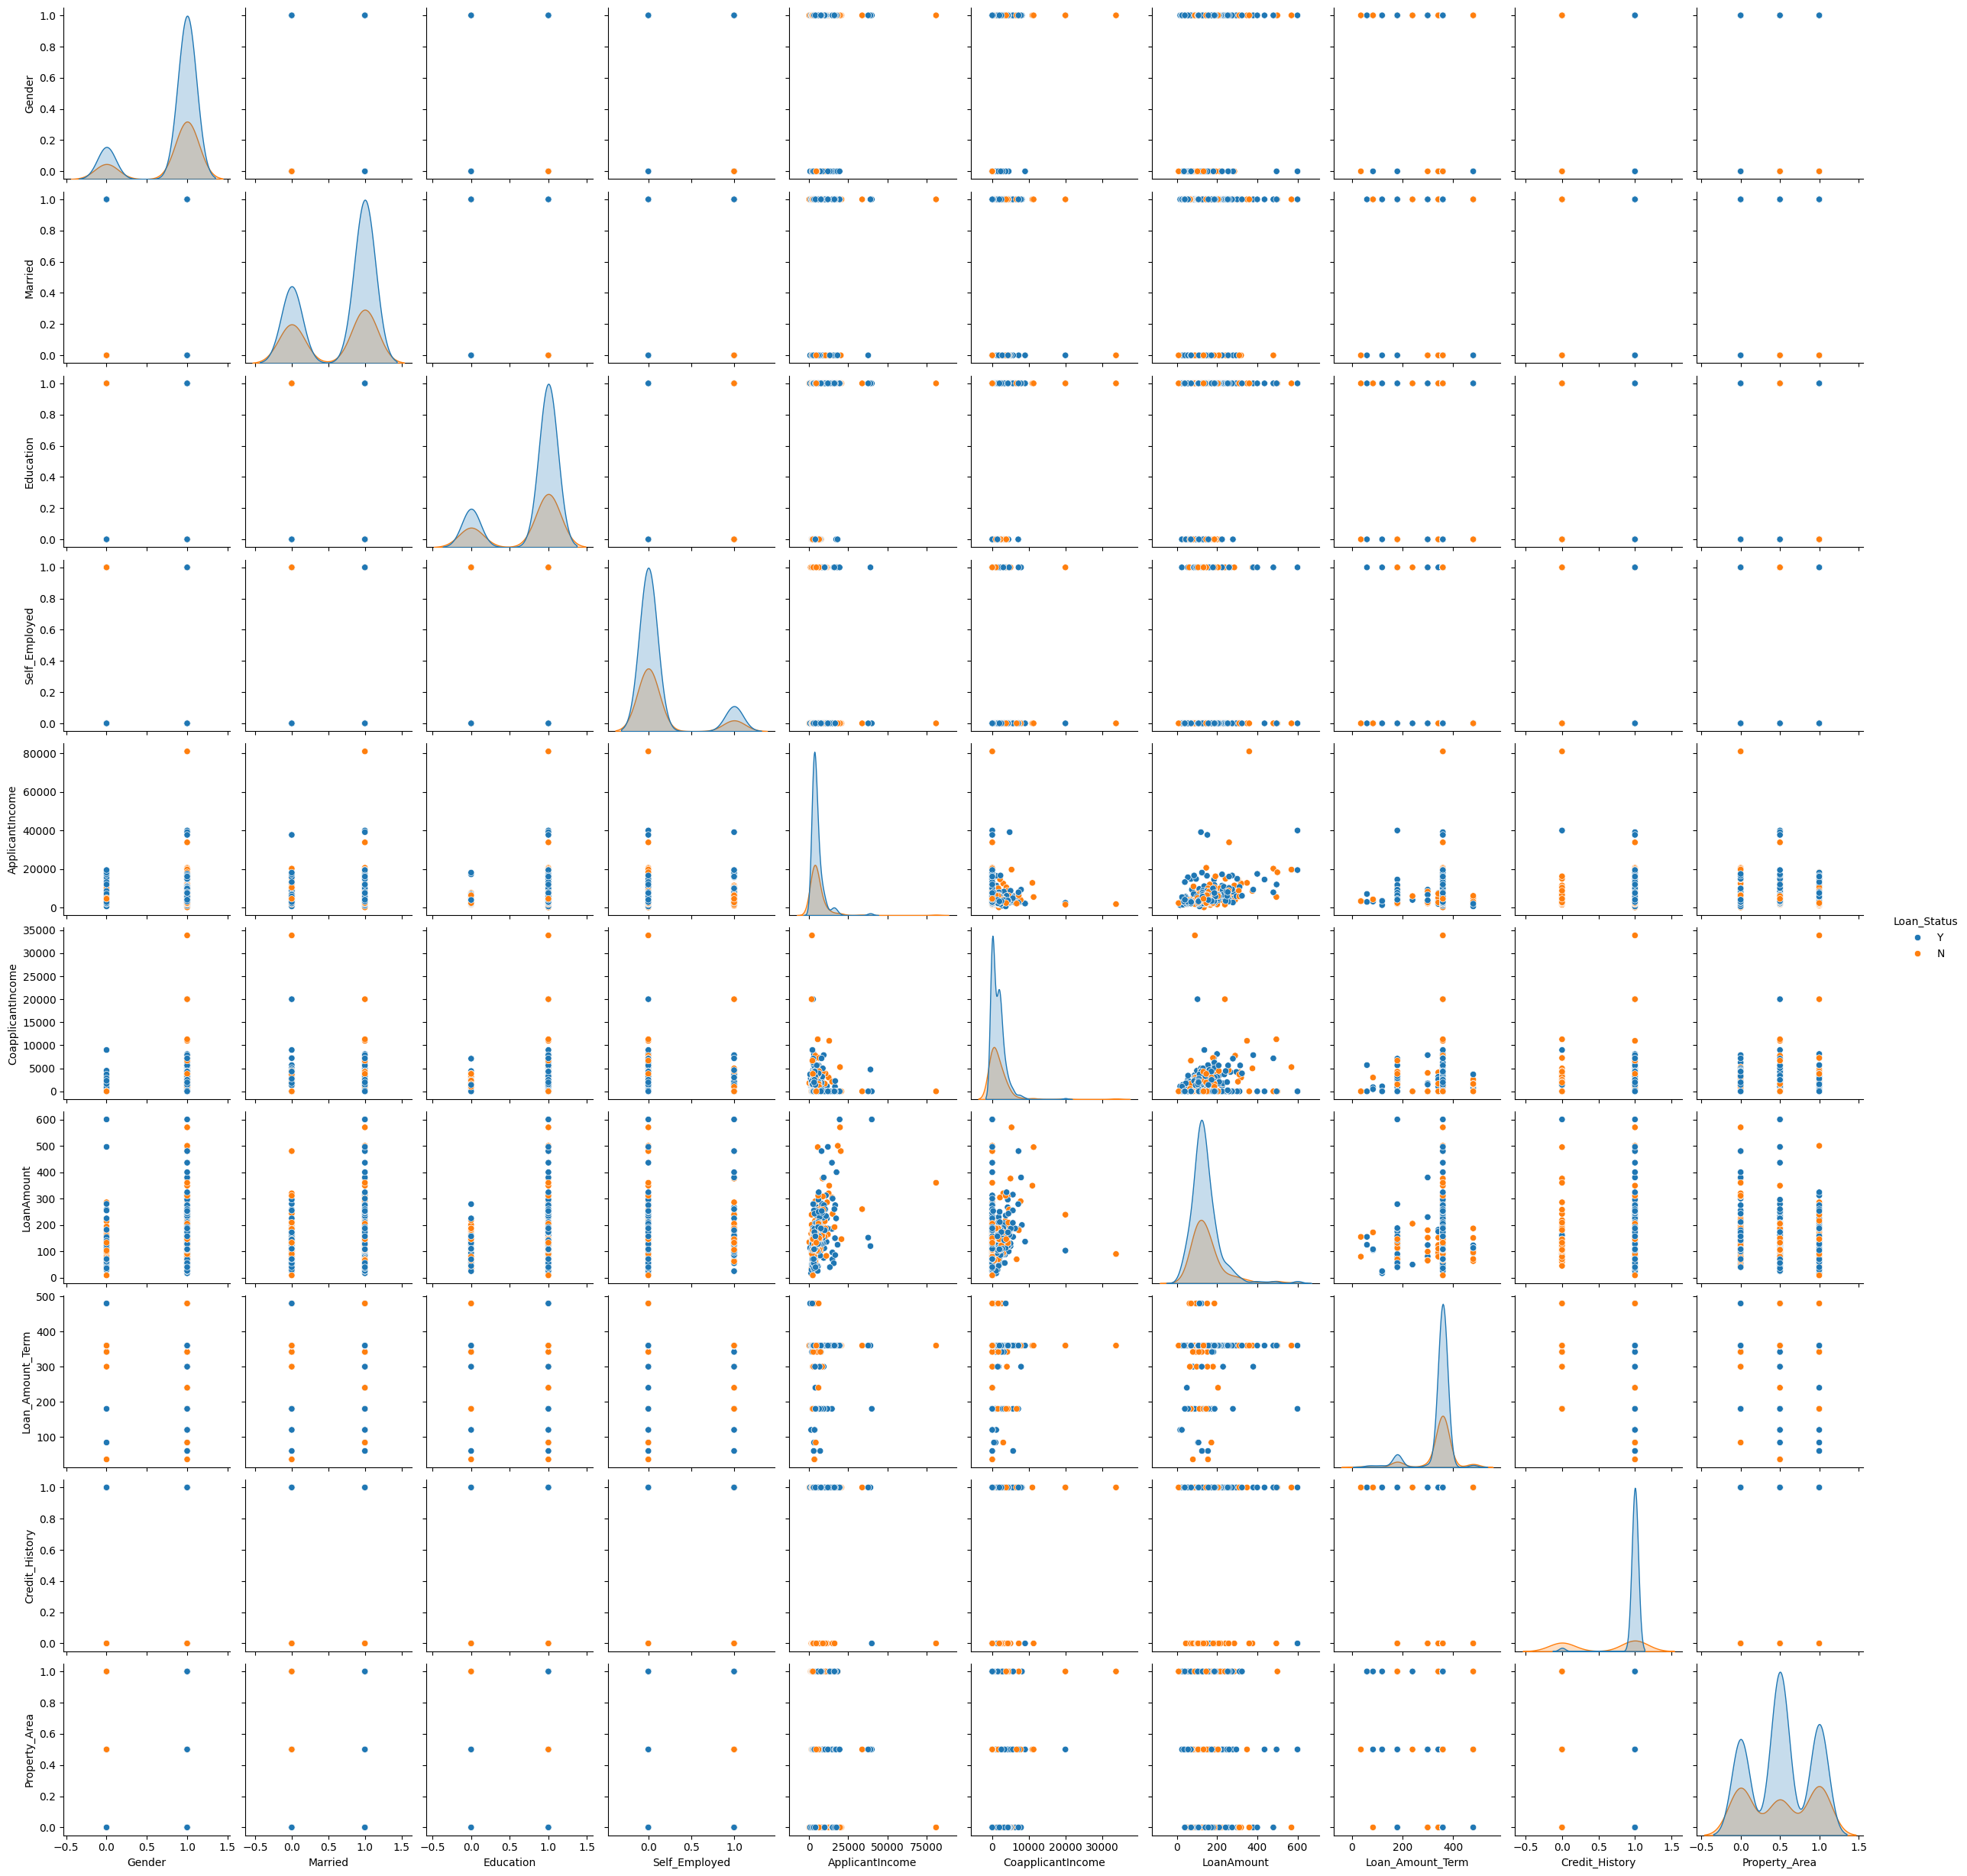

In [ ]:
import seaborn as sns
sns.pairplot(data,hue='Loan_Status')

scale2 is MinMaxScaler and model3 is again a LogisticRegression model with max_iter=200

In [ ]:
scale2=MinMaxScaler()
x_scale2=scale.fit_transform(x)
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scale,y,test_size=0.25)
model3=LogisticRegression(max_iter=200)
model3.fit(x_train2,y_train2)

LogisticRegression(max_iter=200)

y_test_pred3 is the prediction of model3

In [ ]:
y_test_pred3=model3.predict(x_test2)

In [ ]:
accuracy3=accuracy_score(y_test2,y_test_pred3)
conmat3=confusion_matrix(y_test2,y_test_pred3)

accuracy of model3 is 0.8125 i.e. 81.25%

In [ ]:
accuracy3

0.8125

In [ ]:
conmat3

array([[15, 23],
       [ 1, 89]])

model4 is RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y_test_pred4=model4.predict(x_test)

In [ ]:
accuracy4=accuracy_score(y_test,y_test_pred4)
conmat4=confusion_matrix(y_test,y_test_pred4)

accuracy is 0.8046 i.e. 80.46%

In [ ]:
accuracy4

0.8046875

In [ ]:
conmat4

array([[25, 16],
       [ 9, 78]])

Conclusion:

SVC is the best suitable model for this case study as i got the accuracy as 85.15% LogisticRegression is also up to the mark because with StandardScaler i.e.84.37% and with minmaxscaler accuracy got decreased to 81.25%. And i got the minimum accuracy of 80.46% with RandomForestClassifier.

Along with that feature importance plot using the model coeffiecient of Logistic Regression shows that the Credit_History is the most important feature and Property_Area is the Least important feature to get the Loan_status.